<a href="https://colab.research.google.com/github/Paulina9555/015_decision_tree/blob/main/015_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Eksploracja danych](#2)
4. [Przygotowanie danych do modelu](#3)
5. [Budowa klasyfikatora drzewa decyzyjnego](#4)
6. [Graf drzewa decyzyjnego](#5)
7. [Budowa funkcji dla modelu drzewa decyzyjnego](#6)

### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='1'></a> Załadowanie danych

In [10]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_') for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwa zmiennych objaśniajacych: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwa zmiennych objaśniajacych: ['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


### <a name='2'></a> Eksploracja danych

In [11]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
plt.figure(figsize=(8,6))
_ = sns.scatterplot('sepal_length','sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

In [14]:
df['target'].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


### <a name='3'></a> Przygotowanie danych do modelu

In [15]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

KeyError: "['sepal_length', 'sepal_width'] not in index"

In [17]:
target.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [18]:
data = data.values
target=target.values.astype('int16')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### <a name='4'></a> Budowa klasyfikatora drzewa decyzyjnego

In [19]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

ValueError: Filler values must be provided when X has more than 2 training features.

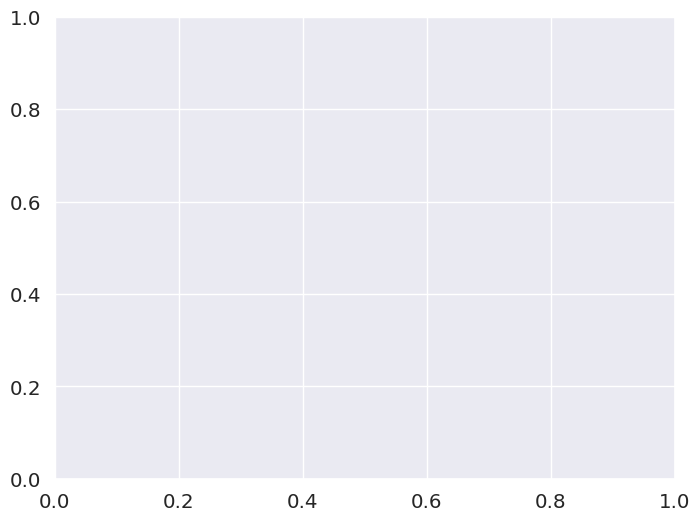

In [21]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b, #31c30f, #64647F, #d62728, #9467bd, #8c564b, #e377c2, #7f7f7f, #bcbd22, #17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8,6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max depth=1, accuracy: {acc * 100:2f}%')
plt.show()

### <a name='5'></a> Graf drzewa decyzyjnego

In [22]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[:2],
                class_names = target_names,
                special_characters=True,
                rounded=True,
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(graph.png)
Image(graph.crate_png(), width=30)

ModuleNotFoundError: No module named 'sklearn.externals.six'